## 参考（というかコピペ元）
https://qiita.com/matsxxx/items/363c5a78f2d68ecd6fb3

## 参考（チェビシェフ・スペクトル法の理念として）
https://www1.gifu-u.ac.jp/~tanaka/numerical_analysis.pdf

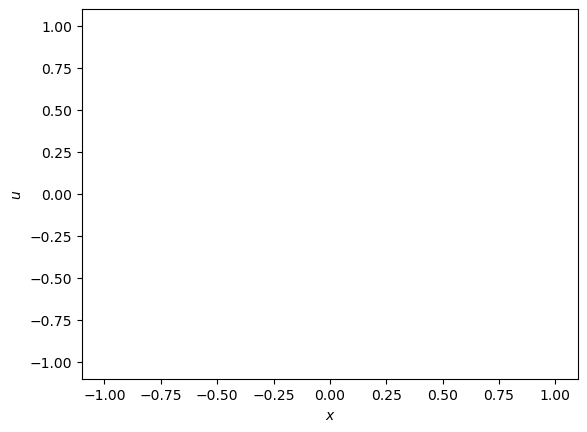

In [21]:
import numpy as np
from scipy.integrate import solve_ivp

#演算子と格子点を出力する
def cheb(N):
    '''Chebyshev polynomial differentiation matrix.
       Ref.: Trefethen's 'Spectral Methods in MATLAB' book.
    '''
    x      = np.cos(np.pi*np.arange(0,N+1)/N)
    if N%2 == 0:
        x[N//2] = 0.0 # only when N is even!
    c      = np.ones(N+1); c[0] = 2.0; c[N] = 2.0
    c      = c * (-1.0)**np.arange(0,N+1)
    c      = c.reshape(N+1,1)
    X      = np.tile(x.reshape(N+1,1), (1,N+1))
    dX     = X - X.T
    D      = np.dot(c, 1.0/c.T) / (dX+np.eye(N+1))
    D      = D - np.diag( D.sum(axis=1) )
    return D,x

#Burgers方程式
def burgers(t, u, nu, D, D2):
    conv = u * D @ u #移流項: D:1階微分
    vis = nu * D2 @ u #粘性項: D2:2階微分
    bur = -conv + vis
    bur[0] = 0 #境界条件
    bur[-1] = 0 #境界条件
    return bur

N = 500 #格子点数
T = 1#最大時間
t = np.linspace(0, T, 50) #時間
D, x = cheb(N) #D:1階微分演算子、x:x座標
D2 = D @ D #2階微分演算子

#パラメータ
nu = 0.01  #動粘性係数

#初期値
u0 = np.sin(- np.pi * x )

#数値計算
sol_bur = solve_ivp(burgers, [0, T], u0, method='Radau', t_eval=t, args=(nu,D,D2))

#計算結果
u = sol_bur.y

#可視化
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
fig = plt.figure()
ims = []
for uu in u.T:
    im = plt.plot(x, uu, c='g')
    plt.xlabel("$x$")
    plt.ylabel("$u$")
    ims.append(im)
ani_bur = animation.ArtistAnimation(fig, ims, interval=50)
HTML(ani_bur.to_html5_video())


In [16]:
print(x.shape)

(501,)


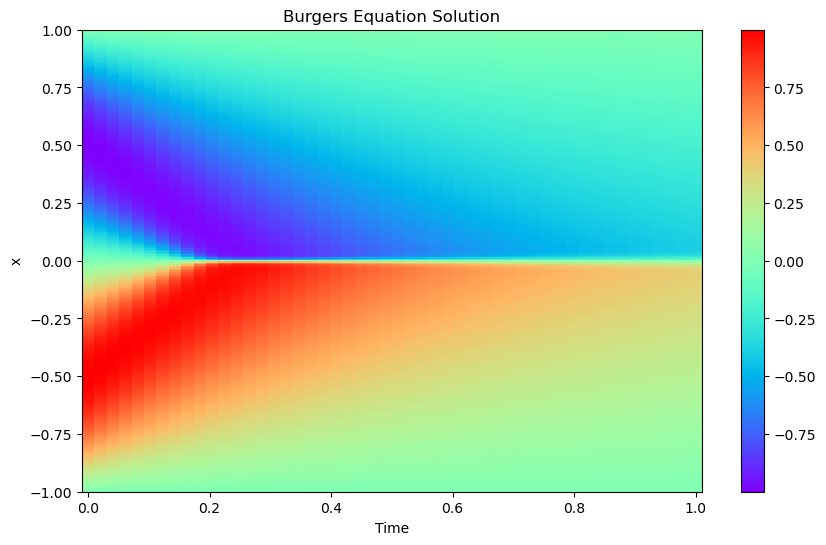

In [22]:
import matplotlib.pyplot as plt
import numpy as np

# tとxのグリッドを作成
T, X = np.meshgrid(t, x)

# ヒートマップの作成
plt.figure(figsize=(10, 6))  # グラフのサイズを設定
plt.pcolormesh(T, X, u, shading='auto', cmap='rainbow')  # uをヒートマップとして表示
plt.colorbar()  # カラーバーを表示
plt.xlabel('Time')  # x軸のラベル
plt.ylabel('x')  # y軸のラベル
plt.title('Burgers Equation Solution')  # グラフのタイトル
plt.show()  # グラフを表示
